# Ford Gobike Exploration
## by Christopher James

## Preliminary Wrangling

This dataset contains information on rental bike sessions in October 2018. The start_time and end_time columns were converted to datetime objects. An additional column was created to show the hour of the day a ride started.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load dataset in dataframe
df_original = pd.read_csv('201810-fordgobike-tripdata.csv', sep = ';')

In [3]:
# Make a copy of original dataframe before wrangling
df = df_original.copy()

In [4]:
# Convert 'start_time' and 'end_time' columns to datetime object.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
# Create column to indicate what hour of the day the session started
df['hour_start'] = df['start_time'].dt.strftime('%H').astype(int)

In [6]:
#Shorten bike_share_for_all_trip to bike_share
df['bike_share'] = df['bike_share_for_all_trip']
df.drop('bike_share_for_all_trip', axis = 1, inplace = True)

In [7]:
df.to_csv('201810-fordgobike-tripdata-master.csv', sep = ';')

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hour_start,bike_share
0,80066,2018-10-31 20:49:03.140,2018-11-01 19:03:30.055,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,20,No
1,56428,2018-10-31 20:18:02.881,2018-11-01 11:58:31.146,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,1798,Customer,20,No
2,44825,2018-10-31 20:07:13.378,2018-11-01 08:34:19.367,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,20,No
3,55461,2018-10-31 17:06:37.683,2018-11-01 08:30:59.220,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,17,No
4,47724,2018-10-31 18:27:36.823,2018-11-01 07:43:01.561,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,2392,Customer,18,No


In [8]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(201458, 15)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
hour_start                          int32
bike_share                         object
dtype: object
   duration_sec              start_time                end_time  \
0         80066 2018-10-31 20:49:03.140 2018-11-01 19:03:30.055   
1         56428 2018-10-31 20:18:02.881 2018-11-01 11:58:31.146   
2         44825 2018-10-31 20:07:13.378 2018-11-01 08:34:19.367   
3         55461 2018-10-31 17:06:37.683 2018-11-01 08:30:59.220   
4       

### What is the structure of your dataset?
There are 519,700 bike session in this dataset with 13 features, which are: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, and the added hour_started.


### What is/are the main feature(s) of interest in your dataset?

I am interested in exploring what features contribute to not only a longer ride duration, but also an increased number of rides in this dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe that time of day will contribute to longer duration because of outdoor temperatures and people riding to and from work. I will also look to discover any differences between customers and subscribers, which could cause a change in the number of rides. There is also a bike share for all membership on top of the subscriber one that, among other things, makes the first 60 minutes of a ride free. That could certainly affect both ride count and ride duration. Note that this program is only for the poor, so that might affect the results.

## Univariate Exploration

In [9]:
df['duration_sec'].describe()

count    201458.000000
mean        805.188372
std        1933.750483
min          61.000000
25%         353.000000
50%         557.000000
75%         861.000000
max       86205.000000
Name: duration_sec, dtype: float64

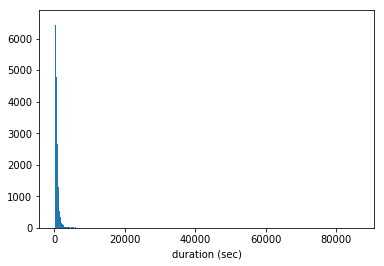

In [10]:
# Investigate the different durations of sessions using regular histogram
bin_size = 25
bin_edges = np.arange(60, 86370, bin_size)
plt.hist(data = df, x = 'duration_sec', bins = bin_edges)
plt.xlabel('duration (sec)');

In [11]:
np.log10(df['duration_sec'].describe())

count    5.304185
mean     2.905897
std      3.286400
min      1.785330
25%      2.547775
50%      2.745855
75%      2.935003
max      4.935532
Name: duration_sec, dtype: float64

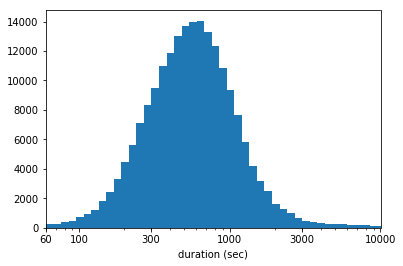

In [25]:
# The distribution is incredibly skewered, so replot chart in log scale. Also limits outliers.
bins = 10 ** np.arange(1.78, 4.93+ 0.2, 0.05)
ticks = [60, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('duration (sec)')
plt.xlim(left = 60, right = 10000);

The duration time chart had an incredibly distorted view in part because of some outliers that I believe are either errors or bikes that were not returned. After plotting in a log scale format, We can see that the majority of rides have durations that last between 300 and 1000 seconds. Next I will be investigating the data broken down by the starting time of each hour of the day.

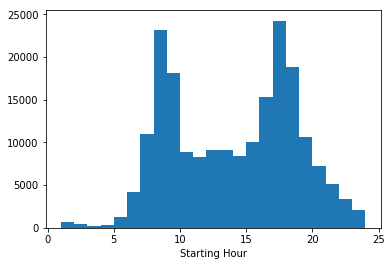

In [13]:
# Display the number of sessions per starting hour
bin_size = 1
bin_edges = np.arange(1, 24+1, bin_size)
plt.hist(data = df, x = 'hour_start', bins = bin_edges)
plt.xlabel('Starting Hour');

The distribution is bimodal, with peaks around both 9:00 AM and 6:00 PM. As would be expected, there are few riders in the early hours of the night. The ramp-up before the first peak is much more rapid than the ramp down after the second one. Finally, I will be exploring the differences between customers and subscribers.

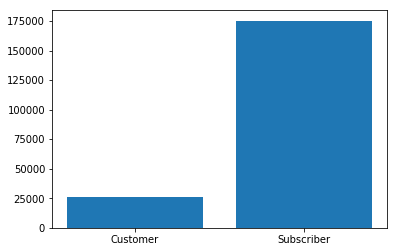

In [14]:
# Display the number of sessions broken down between the 2 user types.
customer_count = df.query('user_type == "Customer"')['start_time'].count()
subscriber_count = df.query('user_type == "Subscriber"')['start_time'].count()
height = [customer_count, subscriber_count]
labels = ['Customer', 'Subscriber']
position = [1, 2]

plt.bar(position, height, tick_label = labels);

As shown here, subscribers are responsible for the overwhelming majority of rides. Next, I will explore the data through the lens of the bike share program.

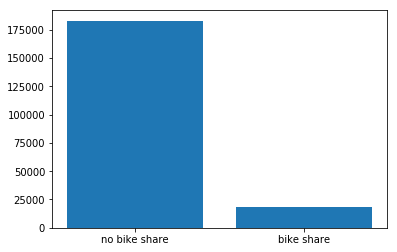

In [15]:
# Create bar chart showing the number of bike share for all based sessions and those that are not based on that.
yes_count = df.query('bike_share == "Yes"')['start_time'].count()
no_count = df.query('bike_share == "No"')['start_time'].count()
height = [no_count, yes_count]
labels = ['no bike share', 'bike share']
position = [1, 2]

plt.bar(position, height, tick_label = labels);

The vast majority of users do not participate in the bike share for all program. This program has financial based enrollment restrictions, so that is not surprising.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the first graph was skewred, so I converted it to a log scale chart. After that, the distribution looked close to normal, peaking between 300 and 1000 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The second chart was a bimodal distribution, peaking at 9:00 AM and again at 6:00 PM. I had to change the start_time and end_time columns to a datetime datatype. I then used that to extract the hour in which each session started and placed that information in a new column.

## Bivariate Exploration

Here, I will start by looking at duration broken down by the hour of start time.

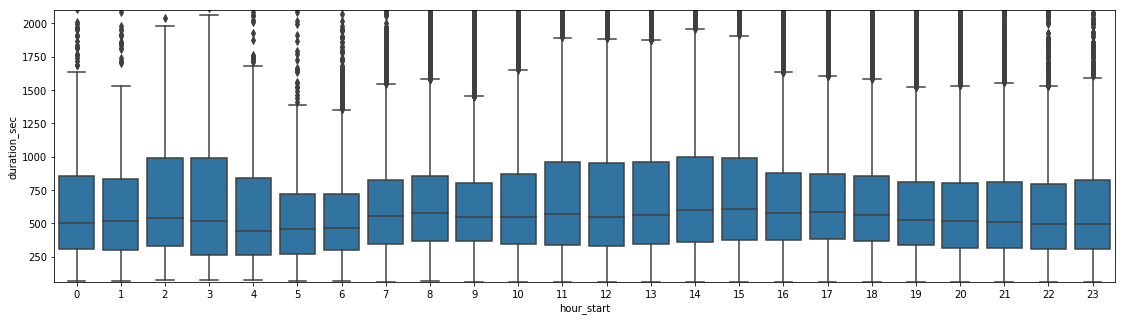

In [16]:
#Create boxplot displaying data on duration broken down by the hour the session started. I cropped out the outliers to give
# a better view.
plt.figure(figsize = [19, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'hour_start', y = 'duration_sec', color = base_color)
plt.ylim(bottom = 60, top = 2100);

The median duration is lower during the times when there are more users. There does not appear to be any meaningful differences in duration based on the time the ride started. This does not warrant further investigation. Now, I will move on to analyzing the possible connection between starting hour and user type.

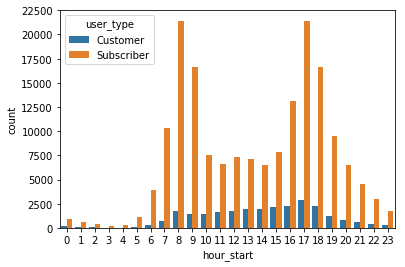

In [17]:
# create a clustered bar chart comparing subscribers to customers by session start hour.
sb.countplot(data = df, x = 'hour_start', hue = 'user_type');

This bar chart shows that not only are the vast majority of users regular users (subscribers), they make up an even bigger percentage of users during the busiest times. The level of customer usage does not have the same peak and drop as the subscriber usage does. Now, I will analyse the possible connection between user type and ride duration.

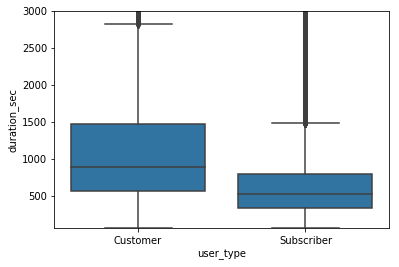

In [18]:
# Create a box chart that displays the data of ride duration of both customers and subscribers. I cropped off the outliers
# to give a better view.
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(bottom = 60, top = 3000);

Here, it is shown that the median duration is much higher for customers than for subscribers. Now, I will take a look at how bike share program users correlate with duration.

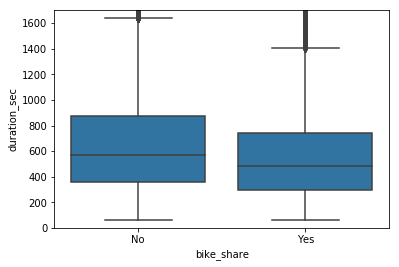

In [19]:
# Create a box chart to display the ride duration for people on the bike share program and those who are not. 
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'bike_share', y = 'duration_sec', color = base_color)
plt.ylim(bottom = 0, top = 1700);

People on the bikeshare program have a lower ride duration than people on it. This is quite surprising because of the fact that for those on the program, the first 60 minutes of a ride are free. Finally, I will explore the possible connection between bike share status and the hour the ride started.

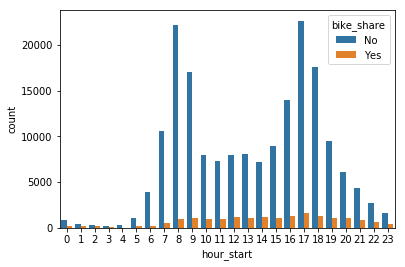

In [20]:
# Create a clustered bar chart that shows the start hour of those on the bike share program and those who are not.
sb.countplot(data = df, x = 'hour_start', hue = 'bike_share');

This chart shows that the majority of the growth during the busy times comes from people not on the bike sharing program. This is the opposite effect of the subscriber program, which is responsible for the vast majority of busy time growth.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During busy times, a great majority of the growth comes from subscribers rather than customers. Subscribers also have a much higher median ride duration than customers. On the other hand, people on the bike share program have a somewhat lower ride duration than those who are not. Also, the additional ride count durng the busy times mostly comes from people who are not in
the bikeshare program.


## Multivariate Exploration

Here, I will examine the interactions of the hour start time, the user type, and the ride duration.

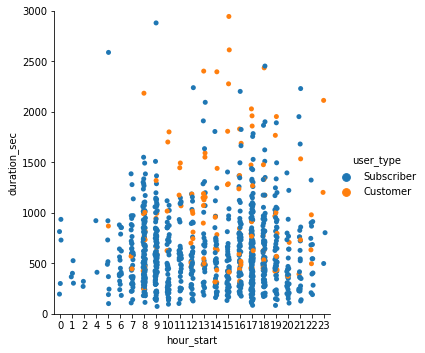

In [8]:
# Create a catplot that displays the duration of each ride broken down by the hour the ride started and further by user type.
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

sb.catplot(data = df_samp, x = 'hour_start', y = 'duration_sec', hue = 'user_type', legend = True)
plt.ylim(bottom = 0, top = 3000);

This chart shows that while the majority of the increased ride numbers during the busier times come from subscribers, the customers that do remain are resopnsible for a big majority of the longer durartions. Finaly, I will display the interactions of the hour of start time, whether users are in the bike share program, and the ride duration.

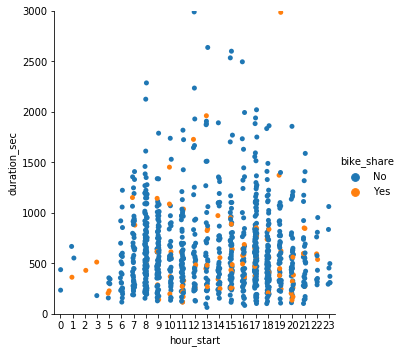

In [41]:
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]
sb.catplot(data = df_samp, x = 'hour_start', y = 'duration_sec', hue = 'bike_share')
plt.ylim(bottom = 0, top = 3000);

As shown above, This chart shows that as a whole, whether during times of high usage or not, users who are part of the bike share program tend to have somewhat lower ride durations than those who are not.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I found that broken down by the hour of start time for the ride, while subscribers make up the vast majority of the growth in ride numbers, customers are actually responsible for most of the longest ride durations. I did not find such a clear coorelation among the bike share participants, except to say that the users who are not part of the program had somewhat higher ride durations. 

### Were there any interesting or surprising interactions between features?

Nothing in particular in this section, except to reiterate My surprise that bike share program participants actually have lower ride durations than users who are not participating. One might expect the durations to be much higher considering the first 60 minutes of a ride are free for participants.